<div align="right">
Massimo Nocentini<br>
<br>May 22, 2016: subsets sums with Gray codes
<br>May 21, 2016: basics, subsets sums
</div>
<br>
<div align="center">
<b>Abstract</b><br>
This document collect some examples about *bit manipulation techniques* and some application of them to contest problems
</div>

# Intro

The current notebook born with the aim to collect introductory material, references, tutorial, code snippet and challenging problems around the topic of *bit manipulation techniques*. It follows to fullfil our need to get a deep understanding of this topic to be competitive in programming (contests).

First of all a collection of general references follows:

   - [__The Aggregate Magic Algorithms__][aggregate], by _Department of Electrical and Computer Engineering at the University of Kentucky_
   - [__Bit Twiddling Hacks__][seander], by _Sean Eron Anderson_
   
On the other hand, the following pages have a spirit toward programming contests:

   - [__CPSC 490 202 - Problem Solving in Computer Science__][CPSC 490 202 current] ([old][CPSC 490 202 old] version)
   
[aggregate]:http://aggregate.org/MAGIC/
[seander]:http://graphics.stanford.edu/~seander/bithacks.html

[CPSC 490 202 old]:http://www.ugrad.cs.ubc.ca/~cs490/sec202/
[CPSC 490 202 current]:http://www.ugrad.cs.ubc.ca/~cs490/2015W2/

# *bit masking* core idea

In this section we study [this][basic] introductory document, where the first paragraph reads:

>Suppose you have a set of objects and you want some way to represent which objects to pick and
which ones not to pick. How do you represent that in in a program? More generally, *how do you
represent a subest of a set*? We can represent whether an object *is picked or not by a single bit*! Using a boolean to represent this is an overkill in terms of memory usage. However, neither C++ nor Java has any data type representing a single bit, so how can we cut down the memory usage?
**The answer is to use an integer!** We know an integer is just a bunch of bits stringed together, so
why don’t we use the integer to represent the entire set?

> For example, suppose in a set of 5 objects, we have picked the 1st, 3rd, and 4th object. The bitmask to represent this in binary is 01101 or 13 in decimal (in the notes, the 1st bit will always be the least significant bit and
will always appear at the very right). *We have just cut down the memory usage from five booleans to
a single integer*!

Then follows a list of basic manipulations, which we coded in [this][our:bits] Python module, loaded in the next cell; two functions deserve attention, namely `subsets` and `subsets_of`, read the docstring for info.

[basic]:http://www.ugrad.cs.ubc.ca/~cs490/sec202/notes/intro/bitmask.pdf
[our:bits]:https://github.com/massimo-nocentini/competitive-programming/blob/master/python-libs/bits.py

In [1]:
%matplotlib inline
%run ../python-libs/bits.py
%run ../python-libs/timing.py
%run ../python-libs/graycodes.py
%run ../python-libs/symbols.py

# Sum of subsets: a first example

## With "usual" subsets generation

Previous doc finishes with an first application of bitmasking, here the request:

>Bitmask is an efficient and convenient way to represent subsets. For example, **given a set of numbers,
we want to find the sum of all subsets**. This is easy to code using bitmasks. Furthermore, we can use
an array to store all the results (imagine storing the results when you are using an array to represent
the subset)!

The following cell contains a pythonic implementation of their code, which is given in `C`: generator `subsets` yields subsets one by one, such that a successor subset `s` is computed by a previous subset `p` by *increment*, namely `s = p + 1`.

In [2]:
def subsets_sums(S):
    """
    Returns a map of `(s, v)`, where `s` is a subset of `S`, and `v` is `sum(i in S & s)`.
    """
    n = len(S)
    sums = [0 for _ in range(1 << n)]
    for s in subsets(n):
        for j, v in enumerate(S):
            sums[s] += is_on(s, j, return_int=True) * v
    
    return sums

As a first experiment, let `S` be a list of 4 random integers, each one less than $2^{8}$.

In [3]:
from random import randrange
S = [randrange(1 << 8) for _ in range(1 << 2)]
S

[184, 150, 30, 153]

We time the execution of the function `subsets_sums` applied to `S` and bind `sums` to the resulting mapping:

In [4]:
with timing(lambda: subsets_sums(S)) as (sums, start, end):
    print("Elapsed time: {:.5} secs".format(end-start))

Elapsed time: 0.00037456 secs


Have a look at results, after the definition of the pretty printing utility `pretty_dict`:

In [5]:
def pretty(sums):
    """
    Utility pretty printer.
    """
    return {pretty_mask(j, coding='little', width=len(S)): v for j, v in enumerate(sums)}

In [6]:
pretty(sums)

{'0000': 0,
 '0001': 153,
 '0010': 30,
 '0011': 183,
 '0100': 150,
 '0101': 303,
 '0110': 180,
 '0111': 333,
 '1000': 184,
 '1001': 337,
 '1010': 214,
 '1011': 367,
 '1100': 334,
 '1101': 487,
 '1110': 364,
 '1111': 517}

### Repeating experiments

In [7]:
def plotter(do, n):
    
    import matplotlib.pyplot as plt

    def doer(i):
        """
        Repeat the previous experiment with lists of integers lengths `i`.
        """
        S = [randrange(1 << 8) for _ in range(i)]
        with timing(lambda: do(S)) as (sums, start, end):
            return end - start

    l = range(n)
    line, = plt.plot(l, list(map(doer, l)), '--', linewidth=2)

    plt.xlabel("lengths")
    plt.ylabel("secs")
    plt.show()

Moreover, we repeat the above experiment for lists of integers with different lengths to understand the *exponential* complexity of *subsets* enumeration: the longer list will have **24 integers** and it took aproximately **5 minutes** to return an answer.

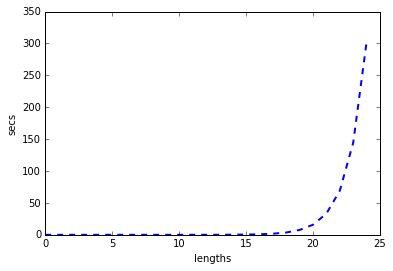

In [13]:
plotter(subsets_sums, n=25)

## Subsets enumeration as Gray codes

Another order of generation can be used for subsets, namely we see each subset as a [Gray code][gray]. In this way we know that consecutive subsets differs *exactly* by one bit, which is the same to say that they have the same objects but one, so *one* object goes away or comes in. 

Here is the a new function `subsets_sums_gray` that uses two hooks; given two consecutive subsets and `p` is the position of the bit `b` that toggles, if `b` switches *off* then `off` hook removes the corresponding value `S[p]` from the sum cumulated up to now, otherwise `add` hook adds `S[p]` to the sum.

[gray]:http://nbviewer.jupyter.org/github/massimo-nocentini/competitive-programming/blob/master/tutorials/graycodes.ipynb?flush_cache=true

In [8]:
def subsets_sums_gray(S):
    """
    Returns a map of `(s, v)`, where `s` is a subset of `S`, and `v` is `sum(i in S & s)`.
    """
    return list(high(gray_codes(length=len(S)),                
                on= lambda p, r: r + S[p],                      
                off=lambda p, r: r - S[p], 
                redux=0))

We time the new experiment applying it to the same list of integers `S`:

In [9]:
with timing(lambda: subsets_sums_gray(S)) as (res, start, end):
    
    print("Elapsed time: {:.5} secs".format(end-start))
    
    sums_gray = [0 for _ in range(1 << len(S))]
    for o, s, p, r in res:
        sums_gray[s] = r

Elapsed time: 0.00019288 secs


and we pretty print the subsets sums

In [10]:
pretty(sums_gray)

{'0000': 0,
 '0001': 153,
 '0010': 30,
 '0011': 183,
 '0100': 150,
 '0101': 303,
 '0110': 180,
 '0111': 333,
 '1000': 184,
 '1001': 337,
 '1010': 214,
 '1011': 367,
 '1100': 334,
 '1101': 487,
 '1110': 364,
 '1111': 517}

checking that the answers are the same

In [11]:
assert sums == sums_gray

We repeat the experiment for lists of integers of different lengths as done before:

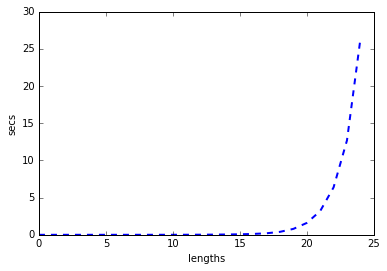

In [12]:
plotter(subsets_sums_gray, n=25)

using this order of subsets generations we gain approximately a **10-factor** respect the "usual" generation order.

# Primality testing

In [129]:
from sympy import IndexedBase, Eq, solve, init_printing, Xor
from math import sqrt, ceil
from itertools import product
from collections import defaultdict

init_printing()

def prefix_dictionaries(n, indexes): # be the integer under study, we would like to decide if is a *prime* or not
    
    x, y = indexes
    
    ones = ones_of(n) # is the list of positions in the binary representation of `n` where bits are 1
    bits = ones[-1] + 1  # bits is the number of bits necessary to represent `n` in binary

    for prefix in range(ceil(sqrt(bits)), bits):
        compl = bits - prefix
        pairs = defaultdict(lambda: 0)
        for i, j in product(range(0,prefix+1), range(0,compl)): # compl
            pairs[i+j] += x[i]*y[j]
        yield compl, pairs
        
def prefix_systems(n, dicts, init={}):
    for compl, dictionary in dicts:
        yield { (k, compl) : Eq(is_on(n, k, return_int=True), v).subs(init) 
               for k, v in dictionary.items() if k}
    
def rec(eqs, subscripts_sum, substitutions):
    
    if not eqs: yield substitutions
    
    eq = eqs.pop(subscripts_sum)
    
    substitutions[y[subscripts_sum]] = 0
    subst_eq = eq.subs(substitutions)
    if not subst_eq:
        yield False
    elif subst_eq == True:
        yield from rec(dict(eqs), subscripts_sum + 1, substitutions)
    else:
        sol = solve(subst_eq, x[subscripts_sum]).pop()
        new_substitutions = dict(substitutions)
        new_substitutions[x[subscripts_sum]] = sol.rhs % 2
    
    
def diofantine(systems):
    for s in systems:
        for sol in solve(s):
            for (k, compl), v in sol.items():
                for i in range(1, compl):
                    eq = v[i, compl]
                    substitutions = {y[i]:1}
                    
                
                if not v.is_integer: break
            else:
                yield sol

def factorize(n, sols, indexes, init={}):
    x, y = indexes
    for sol in sols:
        working_sol = defaultdict(lambda: 0)
        working_sol.update(init)
        working_sol.update(sol)
        p, q = 0, 0
        for i in range(n.bit_length()):
            p = set_bit(p, i) if working_sol[x[i]] else clear_bit(p, i)
            q = set_bit(q, i) if working_sol[y[i]] else clear_bit(q, i)
        yield p, q
        

In [126]:
x, y = IndexedBase('x'), IndexedBase('y')

n = 35

g = prefix_dictionaries(n, (x,y))

In [45]:
next(g)

In [127]:
init = {x[0]:1, y[0]:1}
eqs = prefix_systems(n, g, init)

In [128]:
next(eqs)

In [125]:
sols = diofantine(eqs)

In [54]:
next(sols)

AttributeError: 'dict' object has no attribute 'is_Relational'

In [404]:
factors = factorize(n, sols, (x,y), init)

In [407]:
next(factors)

KeyboardInterrupt: 

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Bitmasking tutorial</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="massimo.nocentini@unifi.it" property="cc:attributionName" rel="cc:attributionURL">Massimo Nocentini</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/massimo-nocentini/competitive-programming/blob/master/tutorials/bitmasking.ipynb" rel="dct:source">https://github.com/massimo-nocentini/competitive-programming/blob/master/tutorials/bitmasking.ipynb</a>.